In [10]:
# To load the mnist data
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
 
# importing various types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
 
# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Split the data into training and testing
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
 
# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


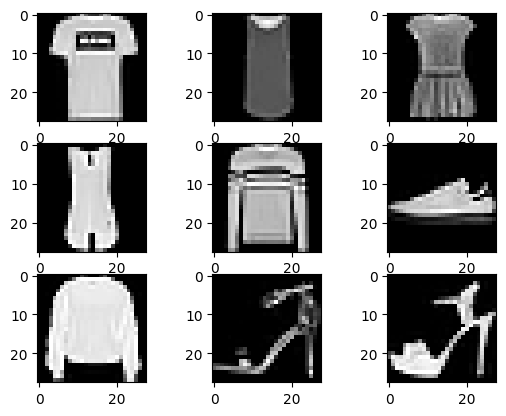

In [12]:
for i in range(1, 10):
    # Create a 3x3 grid and place the
    # image in ith position of grid
    plt.subplot(3, 3, i)
    # Insert ith image with the color map 'grap'
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
 
# Display the entire plot
plt.show()

In [9]:

trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)
 
print(trainX.shape)

(60000, 28, 28, 1)


In [14]:
def model_arch():
    models = Sequential()
     
    # We are learning 64 
    # filters with a kernel size of 5x5
    models.add(Conv2D(64, (5, 5),
                      padding="same",
                      activation="relu", 
                      input_shape=(28, 28, 1)))
     
    # Max pooling will reduce the
    # size with a kernel size of 2x2
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(128, (5, 5), padding="same",
                      activation="relu"))
     
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(256, (5, 5), padding="same", 
                      activation="relu"))
     
    models.add(MaxPooling2D(pool_size=(2, 2)))
     
    # Once the convolutional and pooling 
    # operations are done the layer
    # is flattened and fully connected layers
    # are added
    models.add(Flatten())
    models.add(Dense(256, activation="relu"))
     
    # Finally as there are total 10
    # classes to be added a FCC layer of
    # 10 is created with a softmax activation
    # function
    models.add(Dense(10, activation="softmax"))
    return models

In [15]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
			loss='sparse_categorical_crossentropy',
			metrics=['sparse_categorical_accuracy'])

model.summary()


/usr/local/python/3.12.6/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,618,698 (6.17 MB)

 Trainable params: 1,618,698 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    trainX.astype(np.float32), trainy.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10


2024-09-30 13:15:26.672563: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 126064064 exceeds 10% of free system memory.
2024-09-30 13:15:28.039964: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 80683008 exceeds 10% of free system memory.
2024-09-30 13:15:28.196949: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40341504 exceeds 10% of free system memory.
2024-09-30 13:15:30.200513: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40341504 exceeds 10% of free system memory.


  1/100 ━━━━━━━━━━━━━━━━━━━━ 7:29 5s/step - loss: 17.2033 - sparse_categorical_accuracy: 0.1020

2024-09-30 13:15:31.201072: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40341504 exceeds 10% of free system memory.


100/100 ━━━━━━━━━━━━━━━━━━━━ 355s 4s/step - loss: 9.2780 - sparse_categorical_accuracy: 0.4819 - val_loss: 0.3855 - val_sparse_categorical_accuracy: 0.8594
Epoch 2/10


2024-09-30 13:21:21.895972: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/local/python/3.12.6/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 410ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.3855 - val_sparse_categorical_accuracy: 0.8594
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 398s 4s/step - loss: 0.3671 - sparse_categorical_accuracy: 0.8669 - val_loss: 0.3223 - val_sparse_categorical_accuracy: 0.8842
Epoch 4/10


2024-09-30 13:28:41.311156: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 390ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.3223 - val_sparse_categorical_accuracy: 0.8842
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 353s 4s/step - loss: 0.3022 - sparse_categorical_accuracy: 0.8900 - val_loss: 0.2997 - val_sparse_categorical_accuracy: 0.8904
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 391ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.2997 - val_sparse_categorical_accuracy: 0.8904
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - loss: 0.2621 - sparse_categorical_accuracy: 0.9029 - val_loss: 0.2951 - val_sparse_categorical_accuracy: 0.8928
Epoch 8/10


2024-09-30 13:41:44.443081: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 410ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.2951 - val_sparse_categorical_accuracy: 0.8928
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 350s 4s/step - loss: 0.2355 - sparse_categorical_accuracy: 0.9122 - val_loss: 0.2748 - val_sparse_categorical_accuracy: 0.9022
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 410ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.2748 - val_sparse_categorical_accuracy: 0.9022


In [20]:
model.save_weights('./model.weights.h5', overwrite=True)


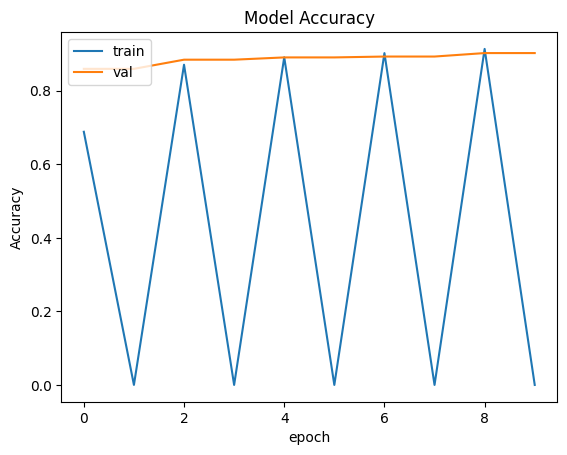

In [48]:

# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

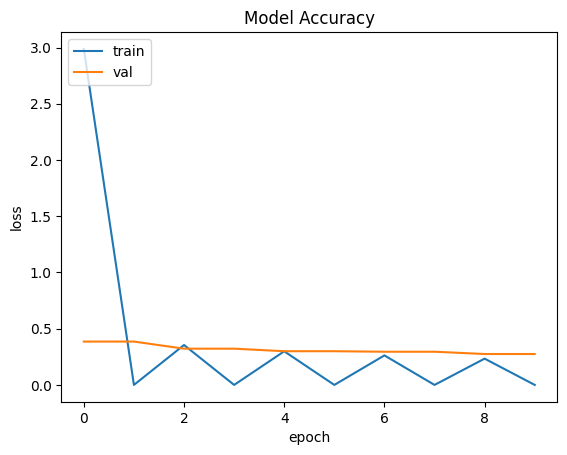

In [47]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


ankle_boots


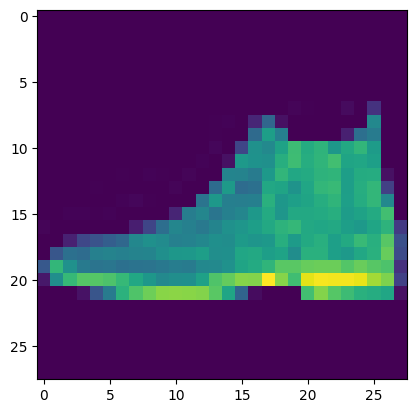

In [46]:
# There are 10 output labels for the Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
# Make a prediction
predictions = model.predict(testX[:1])
label = labels[np.argmax(predictions)]
 
print(label)
plt.imshow(testX[:1][0])
plt.show()

In [44]:
testX.shape

(10000, 28, 28)